We talked the basics of SVM in the [previous blog](http://qingkaikong.blogspot.com/2016/12/machine-learning-7-support-vector.html), and now let's use a example to show you how to use it easily with [sklearn](http://scikit-learn.org/stable/).   



In [67]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('seaborn-poster')
%matplotlib inline

## Load and visualize data 

Let's load the [IRIS](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) from sklearn. This dataset is a very famous dataset for pattern recognition that from Fisher's paper. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The features are Sepal Length, Sepal Width, Petal Length and Petal Width. They are related with the physical propertises of the plant. Today we will use only 2 features for easy visualization purposes. 

In [240]:
# import the iris data
iris = datasets.load_iris()

# let's just use the first two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


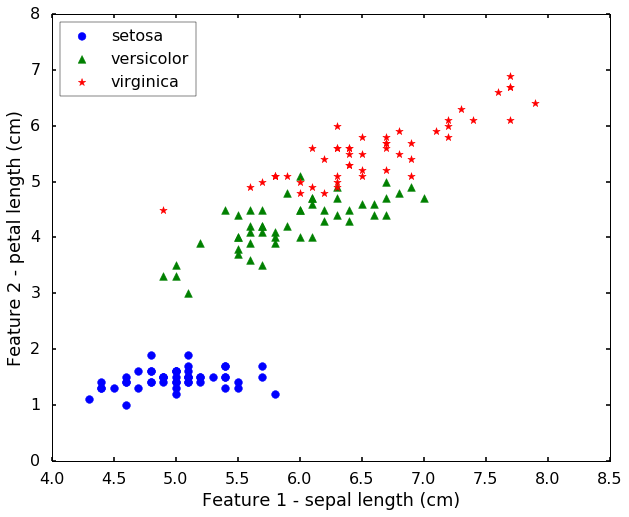

In [241]:
# let's have a look of the data first
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), ['b', 'g', 'r'], ['o', '^', '*'])):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60, label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

## Train an SVM classifier  

Since our purpose is to understand the SVM classifier, therefore, we won't split the data into training, validation, and test dataset. Also, we will not scale the data, because the values are all similar. (In reality, you still want this in your workflow, and use cross-validation or gridsearch to determine some parameters). Here, let's just train the SVM classifier directly. 

In [242]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with data
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## The training results

Let's view the performance on the training data, we will plot the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Also, we will plot the decision boundary, which will help us understand more of the capability of the classifier (since we only have two selected features, this makes us eaiser to view the decision boundary). 

In [253]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(10, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    
    if title is not None:
        plt.title(title)
    
    # highlight the support vectors
    #plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
    #            facecolors='none', zorder=10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

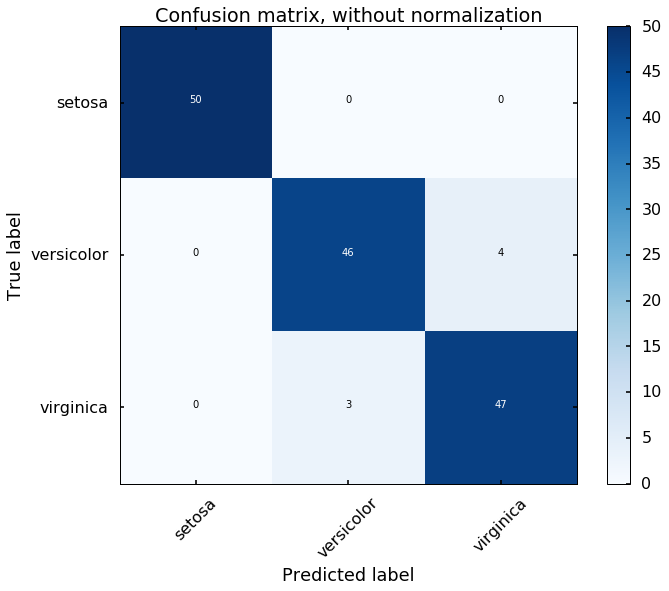

In [244]:
# predict results from the test data
predicted = clf.predict(X)

# plot the confusion matrix
cm = confusion_matrix(y,predicted)
plot_confusion_matrix(cm, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

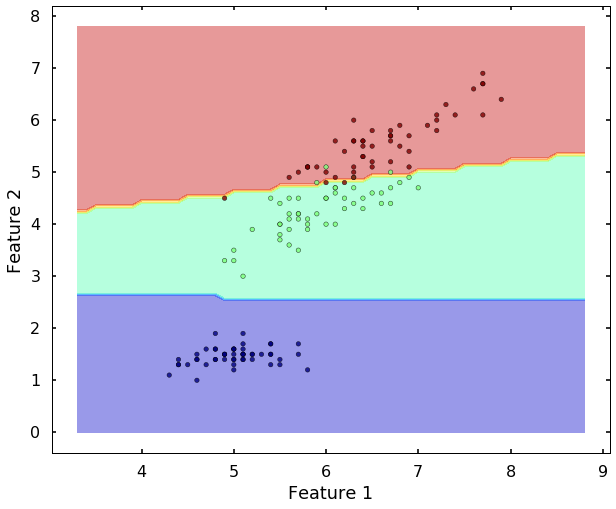

In [245]:
plot_desicion_boundary(X, y, clf)

We can see the above two figures, the SVM classifier actually did a decent job to separate different classes. Since the data is linearly separatable, the 'linear' kernel can satisfy the job. But what if the data is not linearly separatable? Let's see another example. 

## Non-linearly separatable example

In [246]:
# let's construct a dataset that not linearly separatable
X1, y1 = datasets.make_gaussian_quantiles(cov=2.,
                                 n_samples=400, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = datasets.make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=400, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))
n_class = 2

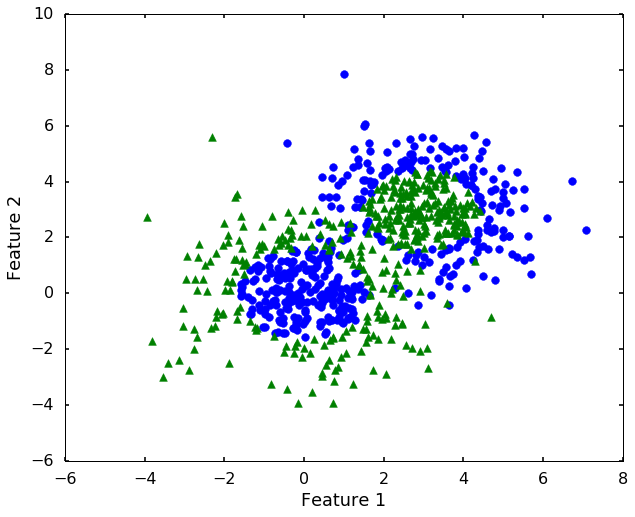

In [247]:
# let's have a look of the data first
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), ['b', 'g'], ['o', '^'])):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [248]:
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

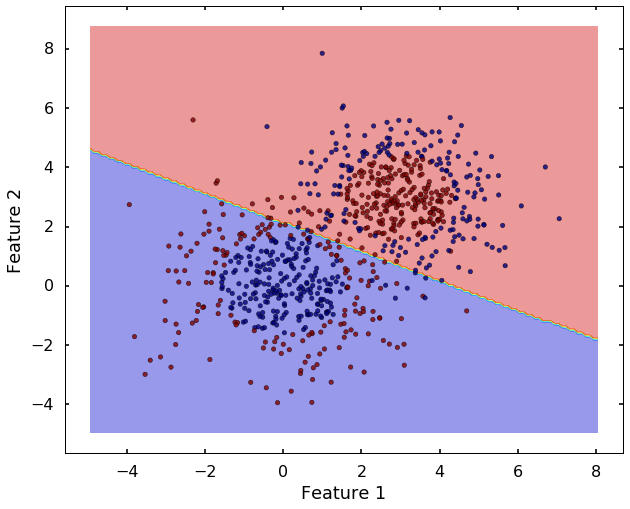

In [249]:
plot_desicion_boundary(X, y, clf)

Now we can see that, the 'linear' kernel is not working anymore. It tries to use a linear boundary to classify the data, which is impossible. Remembered that we talked in the previous blog that using a different kernel will transform this data into higher dimensions to separate them linearly. There are a couple of options in sklearn to choose, the most popular ones are ['rbf' - radial basis function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel), ['poly' - the polynomial](https://en.wikipedia.org/wiki/Polynomial_kernel). We will use 'rbf' here. 

In [251]:
clf = svm.SVC(kernel='rbf')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

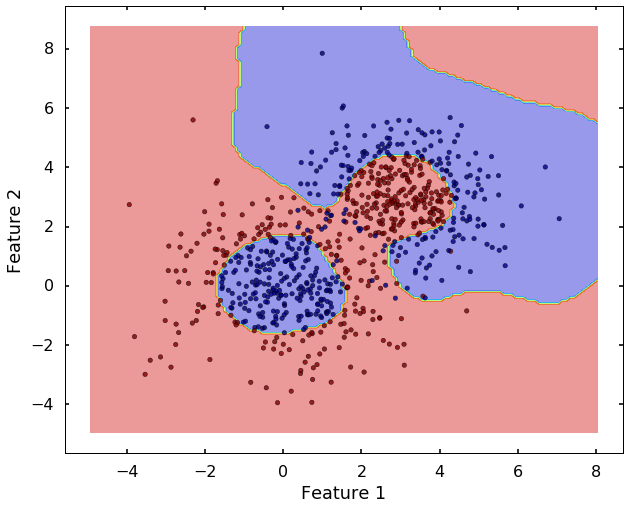

In [252]:
plot_desicion_boundary(X, y, clf)

Haha, after we used the 'rbf' kernel, it seems the SVM can classify them much better. The 'rbf' kernel based SVM looks much flexible, but it also more prone to [overfit](https://en.wikipedia.org/wiki/Overfitting) the data. Therefore, to better use it, you need understand two important parameters: C and gamma, let's have a closer look of them.   

## C and gamma in SVM

The C and gamma parameter in the SVM are the most important parameters for the 'rbf' kernel. C controls the cost of misclassification on the training data, it trades off misclassification on training examples against simplicity of the decision boundary. A large C makes the cost of misclassification high, this will force the algorithm to fit the data with more flexible model, and try to classify the training data correctly as much as possible. But this will also make the SVM more easier to overit the data. Therefore, the simple rule to remember is:
* Larger C, lower bias, higher variance. 
* Smaller C, higher bias, lower variance. 

The following 3 figures showing different values of C, that is, C = 1, C = 100, C = 10000. We can see the higher the value C, the more complicat the decision boundary is, which tries to fit every training data, even with some clearly anomaly data. 

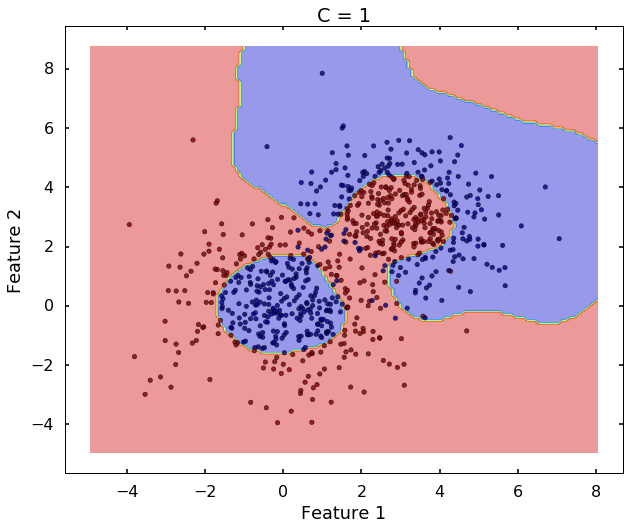

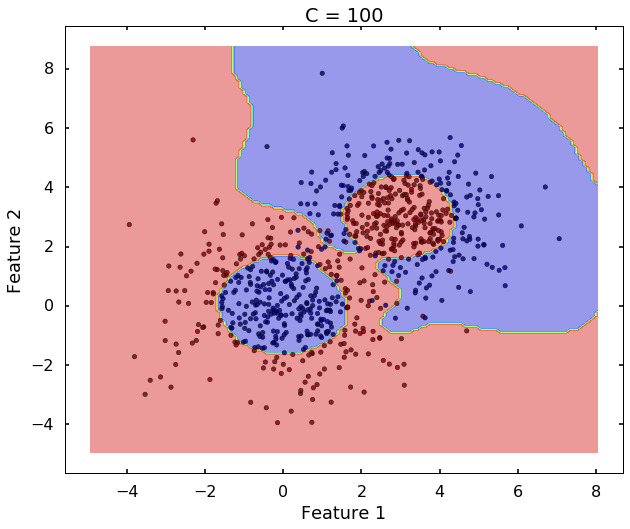

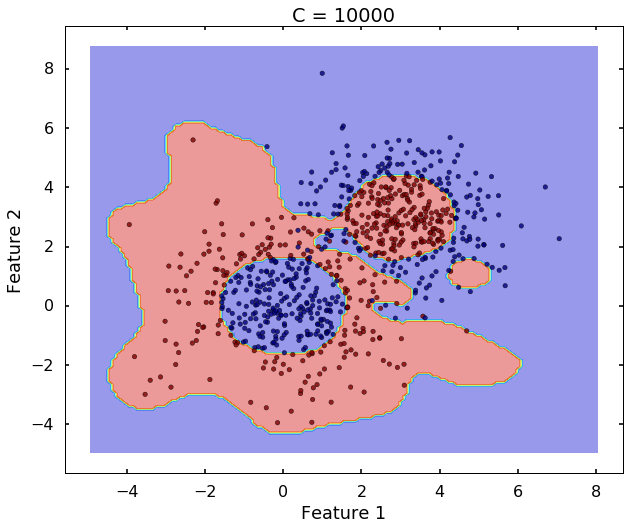

In [265]:
# C = 1
clf = svm.SVC(kernel='rbf', C = 1)
clf.fit(X,y)
plot_desicion_boundary(X, y, clf, title = 'C = 1')

# C = 100
clf = svm.SVC(kernel='rbf', C = 100)
clf.fit(X,y)
plot_desicion_boundary(X, y, clf, title = 'C = 100')

# C = 10000
clf = svm.SVC(kernel='rbf', C = 10000)
clf.fit(X,y)
plot_desicion_boundary(X, y, clf, title = 'C = 10000')

In [ ]:
What about the gamma? 

In [ ]:
https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine